In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("SALES PREDICTION SYSTEM")
print("="*60)

SALES PREDICTION SYSTEM


# Download dataset

In [ ]:
import kagglehub
path = kagglehub.dataset_download("bumba5341/advertisingcsv")
print(f"\nDataset downloaded to: {path}")

100%|██████████| 2.26k/2.26k [00:00<00:00, 4.72MB/s]

Extracting files...

Dataset downloaded to: /root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1


# Load the data

In [ ]:
import os
# List files in the downloaded directory to find the correct CSV file name
print(os.listdir(path))
csv_file = os.path.join(path, "Advertising.csv") # Corrected filename
df = pd.read_csv(csv_file)

print("\n" + "="*60)
print("1. DATA EXPLORATION")
print("="*60)

print("\nDataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

['Advertising.csv']

1. DATA EXPLORATION

Dataset Shape: (200, 5)

First few rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Statistical Summary:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042

In [ ]:
# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

print("\n" + "="*60)
print("2. DATA CLEANING & PREPROCESSING")
print("="*60)


Duplicate Rows: 0

2. DATA CLEANING & PREPROCESSING


In [ ]:
# Remove duplicates if any
df = df.drop_duplicates()

In [ ]:
# Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values removed.")
else:
    print("No missing values found.")


No missing values found.


In [ ]:
# Feature engineering
if 'TV' in df.columns and 'Radio' in df.columns and 'Newspaper' in df.columns:
    df['Total_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
    df['TV_Radio_Interaction'] = df['TV'] * df['Radio']
    df['TV_Ratio'] = df['TV'] / (df['Total_Spend'] + 1)
    df['Radio_Ratio'] = df['Radio'] / (df['Total_Spend'] + 1)
    print("\nNew features created:")
    print("- Total_Spend (sum of all advertising)")
    print("- TV_Radio_Interaction (TV * Radio)")
    print("- TV_Ratio and Radio_Ratio")

    print("\nCleaned Dataset Shape:", df.shape)

print("\n" + "="*60)
print("3. EXPLORATORY DATA ANALYSIS")
print("="*60)


New features created:
- Total_Spend (sum of all advertising)
- TV_Radio_Interaction (TV * Radio)
- TV_Ratio and Radio_Ratio

Cleaned Dataset Shape: (200, 9)

3. EXPLORATORY DATA ANALYSIS


In [ ]:
 #Correlation analysis
print("\nCorrelation Matrix:")
correlation = df.corr()
print(correlation)


Correlation Matrix:
                      Unnamed: 0        TV     Radio  Newspaper     Sales  \
Unnamed: 0              1.000000  0.017715 -0.110680  -0.154944 -0.051616   
TV                      0.017715  1.000000  0.054809   0.056648  0.782224   
Radio                  -0.110680  0.054809  1.000000   0.354104  0.576223   
Newspaper              -0.154944  0.056648  0.354104   1.000000  0.228299   
Sales                  -0.051616  0.782224  0.576223   0.228299  1.000000   
Total_Spend            -0.037606  0.945330  0.293211   0.343059  0.867712   
TV_Radio_Interaction   -0.059243  0.662160  0.681392   0.251706  0.963932   
TV_Ratio                0.067522  0.751997 -0.374891  -0.372780  0.454803   
Radio_Ratio             0.000746 -0.574392  0.552811  -0.014373 -0.262109   

                      Total_Spend  TV_Radio_Interaction  TV_Ratio  Radio_Ratio  
Unnamed: 0              -0.037606             -0.059243  0.067522     0.000746  
TV                       0.945330             

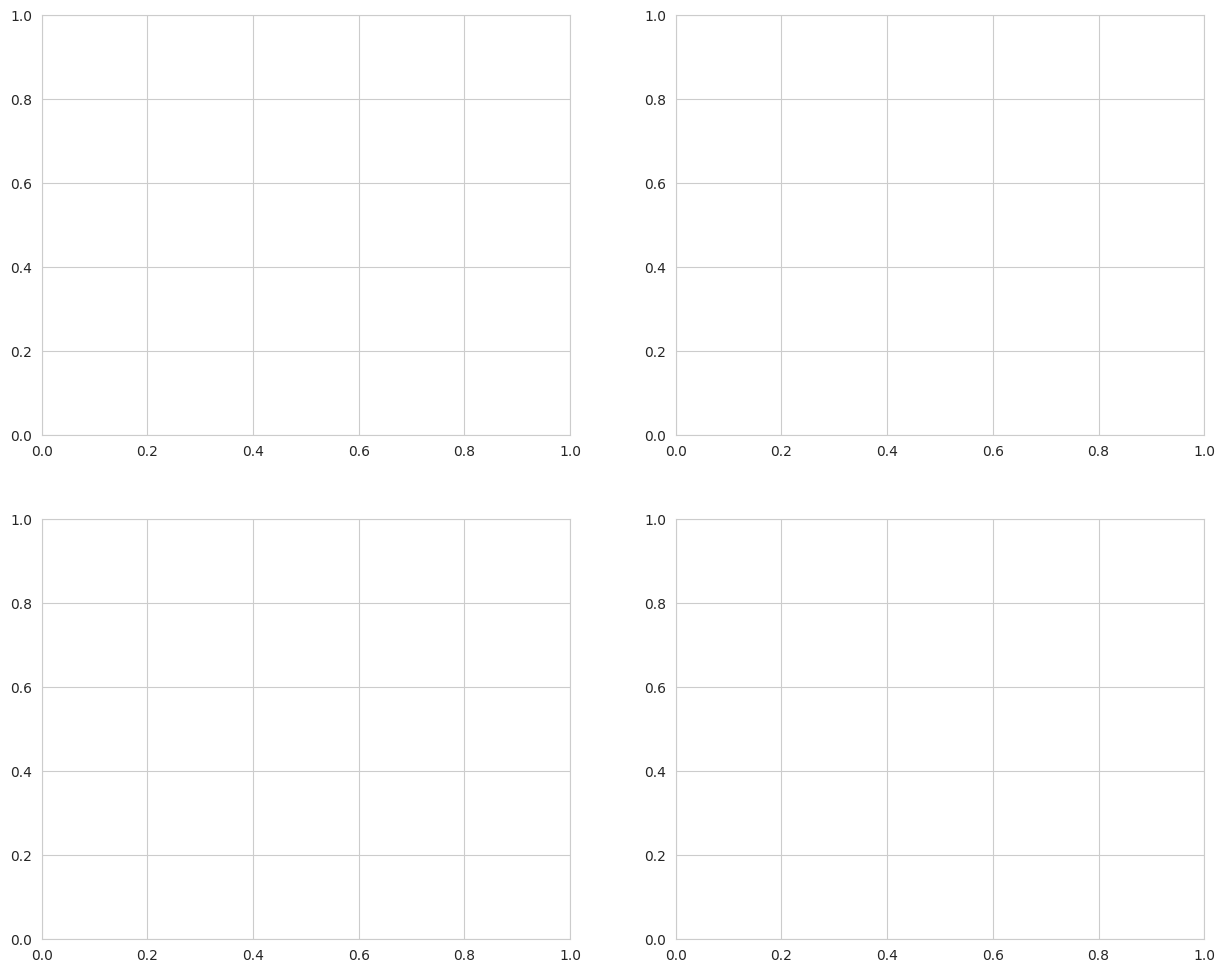

In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [ ]:
# Correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            ax=axes[0, 0], fmt='.2f')
axes[0, 0].set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Correlation Heatmap')

In [ ]:
# Distribution of Sales
if 'Sales' in df.columns:
    axes[0, 1].hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Sales Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Sales')
    axes[0, 1].set_ylabel('Frequency')

In [ ]:
# Advertising spend comparison
if all(col in df.columns for col in ['TV', 'Radio', 'Newspaper']):
    spend_data = df[['TV', 'Radio', 'Newspaper']].mean()
    axes[1, 0].bar(spend_data.index, spend_data.values,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[1, 0].set_title('Average Advertising Spend by Platform',
                         fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Average Spend ($1000s)')

In [ ]:
# TV vs Sales scatter
axes[1, 1].scatter(df['TV'], df['Sales'], alpha=0.6, color='#FF6B6B')
axes[1, 1].set_title('TV Advertising vs Sales', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('TV Advertising ($1000s)')
axes[1, 1].set_ylabel('Sales ($1000s)')

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("\nEDA visualizations saved as 'eda_analysis.png'")
plt.show()

print("\n" + "="*60)
print("4. MODEL BUILDING & TRAINING")
print("="*60)


EDA visualizations saved as 'eda_analysis.png'


<Figure size 1200x600 with 0 Axes>


4. MODEL BUILDING & TRAINING


In [ ]:
# Prepare features and target
if 'Sales' in df.columns:
    X = df.drop('Sales', axis=1)
    y = df['Sales']
else:
    print("Error: 'Sales' column not found!")
    exit()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 160
Testing set size: 40


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}

print("\nTraining models...")
for name, model in models.items():
    # Train model
    if 'Forest' in name or 'Boosting' in name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

print("\n" + "="*60)
print("5. MODEL COMPARISON")
print("="*60)


Training models...

Linear Regression:
  RMSE: 0.6128
  MAE: 0.4461
  R² Score: 0.9881

Ridge Regression:
  RMSE: 0.6085
  MAE: 0.4480
  R² Score: 0.9883

Lasso Regression:
  RMSE: 0.4851
  MAE: 0.3662
  R² Score: 0.9925

Random Forest:
  RMSE: 0.6179
  MAE: 0.4799
  R² Score: 0.9879

Gradient Boosting:
  RMSE: 0.6641
  MAE: 0.4815
  R² Score: 0.9860

5. MODEL COMPARISON


In [ ]:
# Find best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")


Best Model: Lasso Regression
R² Score: 0.9925


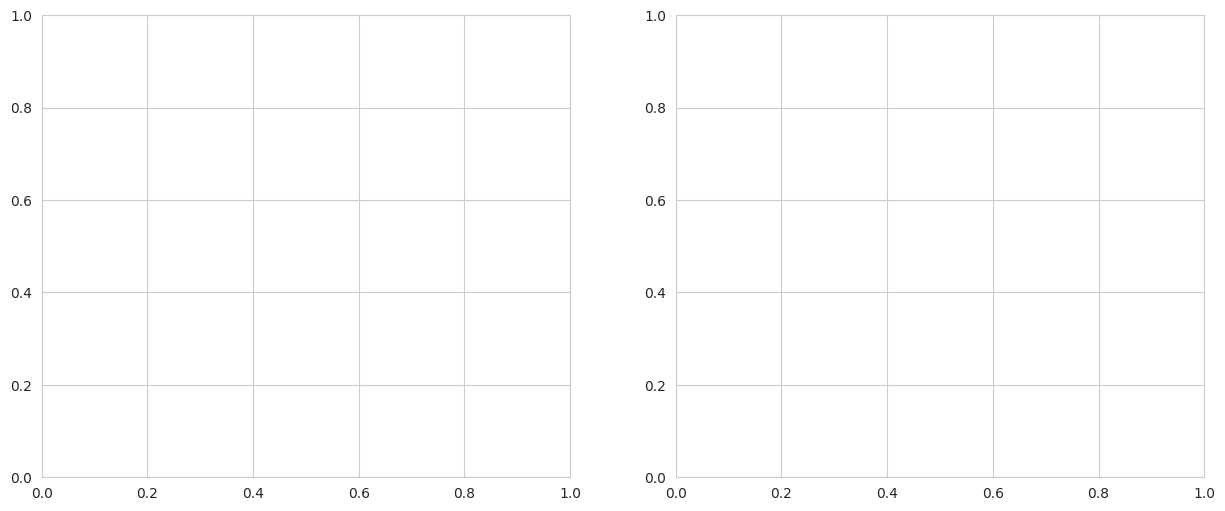

In [ ]:

# Comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


In [ ]:
# Model performance comparison
model_names = list(results.keys())
r2_scores = [results[m]['R2'] for m in model_names]
rmse_scores = [results[m]['RMSE'] for m in model_names]

axes[0].barh(model_names, r2_scores, color='#4ECDC4')
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison - R² Score', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1)

(0.0, 1.0)

In [ ]:
# Actual vs Predicted for best model
best_pred = results[best_model_name]['predictions']
axes[1].scatter(y_test, best_pred, alpha=0.6, color='#FF6B6B')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'k--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Predicted Sales')
axes[1].set_title(f'Actual vs Predicted - {best_model_name}',
                  fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\nModel comparison saved as 'model_comparison.png'")
plt.show()

print("\n" + "="*60)
print("6. FEATURE IMPORTANCE ANALYSIS")
print("="*60)


Model comparison saved as 'model_comparison.png'


<Figure size 1200x600 with 0 Axes>


6. FEATURE IMPORTANCE ANALYSIS


In [ ]:
# Feature importance from best tree-based model
if 'Forest' in best_model_name or 'Boosting' in best_model_name:
    best_model = results[best_model_name]['model']
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'],
             color='#45B7D1')
    plt.xlabel('Importance')
    plt.title('Feature Importance Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\nFeature importance saved as 'feature_importance.png'")
    plt.show()

print("\n" + "="*60)
print("7. BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)


7. BUSINESS INSIGHTS & RECOMMENDATIONS


In [ ]:
# Correlation insights
if all(col in df.columns for col in ['TV', 'Radio', 'Newspaper', 'Sales']):
    tv_corr = df['TV'].corr(df['Sales'])
    radio_corr = df['Radio'].corr(df['Sales'])
    newspaper_corr = df['Newspaper'].corr(df['Sales'])

    print(f"\n1. Advertising Impact on Sales:")
    print(f"   - TV advertising: {tv_corr:.3f} correlation with sales")
    print(f"   - Radio advertising: {radio_corr:.3f} correlation with sales")
    print(f"   - Newspaper advertising: {newspaper_corr:.3f} correlation with sales")

    # Determine strongest channel
    correlations = {'TV': tv_corr, 'Radio': radio_corr, 'Newspaper': newspaper_corr}
    strongest = max(correlations, key=correlations.get)
    print(f"\n   → {strongest} advertising has the strongest impact on sales!")

print(f"\n2. Model Performance:")
print(f"   - Best model achieves {results[best_model_name]['R2']:.1%} accuracy")
print(f"   - Average prediction error: ${results[best_model_name]['MAE']:.2f}k")

print("\n3. Marketing Recommendations:")
if all(col in df.columns for col in ['TV', 'Radio', 'Newspaper', 'Sales']):
    if tv_corr > radio_corr and tv_corr > newspaper_corr:
        print("   ✓ Prioritize TV advertising budget")
        print("   ✓ Consider reducing newspaper spend")
    elif radio_corr > tv_corr and radio_corr > newspaper_corr:
        print("   ✓ Focus on Radio advertising campaigns")
        print("   ✓ Test combined TV + Radio strategies")

    print("   ✓ Use predictive model for budget planning")
    print("   ✓ Monitor ROI across all platforms regularly")

print("\n" + "="*60)
print("8. PREDICTION EXAMPLE")
print("="*60)


1. Advertising Impact on Sales:
   - TV advertising: 0.782 correlation with sales
   - Radio advertising: 0.576 correlation with sales
   - Newspaper advertising: 0.228 correlation with sales

   → TV advertising has the strongest impact on sales!

2. Model Performance:
   - Best model achieves 99.3% accuracy
   - Average prediction error: $0.37k

3. Marketing Recommendations:
   ✓ Prioritize TV advertising budget
   ✓ Consider reducing newspaper spend
   ✓ Use predictive model for budget planning
   ✓ Monitor ROI across all platforms regularly

8. PREDICTION EXAMPLE


In [ ]:
# Example prediction
print("\nExample: Predict sales for new advertising spend")
example = pd.DataFrame({
    'TV': [230.1],
    'Radio': [37.8],
    'Newspaper': [69.2],
    'Unnamed: 0': [0] # Add 'Unnamed: 0' with a dummy value
})

if all(col in example.columns for col in X.columns[:3]):
    example['Total_Spend'] = example['TV'] + example['Radio'] + example['Newspaper']
    example['TV_Radio_Interaction'] = example['TV'] * example['Radio']
    example['TV_Ratio'] = example['TV'] / (example['Total_Spend'] + 1)
    example['Radio_Ratio'] = example['Radio'] / (example['Total_Spend'] + 1)

    # Ensure same column order as training
    example = example[X.columns]

best_model = results[best_model_name]['model']
if 'Forest' in best_model_name or 'Boosting' in best_model_name:
    prediction = best_model.predict(example)[0]
else:
    example_scaled = scaler.transform(example)
    prediction = best_model.predict(example_scaled)[0]

print(f"\nInput:")
print(f"  TV: ${example['TV'].values[0]}k")
print(f"  Radio: ${example['Radio'].values[0]}k")
print(f"  Newspaper: ${example['Newspaper'].values[0]}k")
print(f"\nPredicted Sales: ${prediction:.2f}k")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\n✓ Models trained and evaluated")
print("✓ Visualizations generated")
print("✓ Business insights delivered")
print("\nFiles created:")
print("  - eda_analysis.png")
print("  - model_comparison.png")
print("  - feature_importance.png")


Example: Predict sales for new advertising spend

Input:
  TV: $230.1k
  Radio: $37.8k
  Newspaper: $69.2k

Predicted Sales: $21.46k

ANALYSIS COMPLETE!

✓ Models trained and evaluated
✓ Visualizations generated
✓ Business insights delivered

Files created:
  - eda_analysis.png
  - model_comparison.png
  - feature_importance.png
